
<img src='img/pandas/matplotlib-logo.png' width=300>

Pandas incluye una gran cantidad de utilidades para facilitar la representación gráfica de un dataframe y de sus series usando la libreria Matplotlib. [Ver documentación](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html ). ```pyplot``` es una capa sobre Matplotlib que dota a la librería de una sintaxis similar a la de MATLAB.


La visualización directa con Pandas es fantástica, debido a su fácil uso, para interpretaciones e informes varios. Aunque, no es lo suficientemente versàtil para controlar diversos "criterios", en este caso deberiamos utilizar directamente la libreria matplotlib. Los gràficos de pandas són una abstracción de esta libreria.

Por otro lado veremos algunos ejemplos de visualización con otra libreria llamada [Seaborn](https://seaborn.pydata.org/).

Por ahora, nos limitaremos a hablar sobre los tipos básicos de visualización

- Lineas
- Barras
- Histogramas y Boxplots
- Scatter plots


# Contenido

- M2_0 Introducción a la estructura DataFrame: características, carga y acceso.
- M2_1 Creación y Almacenamiento.
- **M2_2 Visualización con pandas.**
- M2_3 Otras operaciones con DataFrames: agrupaciones de datos.
- M2_4 Uniendo datos y gestionando datos perdidos.
- M2_5 Series temporales.

Volveremos a trabajar con el primer conjunto de datos que usamos, ahora que lo conocemos nos será mas sencillo trabajar con el.


En este bloque ilustraremos los ejemplos de visualización de sus series mediante la función plot. [Ver documentación](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

Vamos a ver un sencillo ejemplo:

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

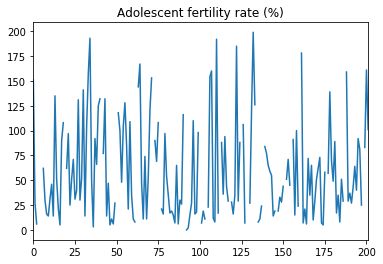

In [9]:
import pandas as pd
df = pd.read_csv("data/who.csv")

ax = df[df.columns[3]].plot() # Podemos usar la función plot sobre una serie de datos

#Al generarse un plot se genera un matplotlib-AxisPlot que permite controlar el entorno del gráfico
ax.set_title(df.columns[3]);

¿Porque la línea que dibujamos es discontinua?

In [29]:
df.loc[:10, df.columns[3]]

0     151.0
1      27.0
2       6.0
3       NaN
4     146.0
5       NaN
6      62.0
7      30.0
8      16.0
9      14.0
10     31.0
Name: Adolescent fertility rate (%), dtype: float64

Se puede obtenr el mismo resultado usando la libreria matplotlib.

In [22]:
import matplotlib.pyplot as plt # Observad como invocamos la capa pyplot

plt.plot(df[df.columns[3]])
plt.title("Fertilidad %")

NameError: name 'df' is not defined

### Otro ejemplo de uso de la función plot.

Matplotlib puede crear graficos X-Y basicos a partir de arrays o listas del mismo tamaño. Si solo le diesemos una lista o array, la graficaría contra su indice.

Cada vez que llamamos a plt.plot() nos sobrepone una nueva curva en la misma figura. Si quisieramos una nueva, deberíamos especificar 'plt.figure()' para crear una nueva.

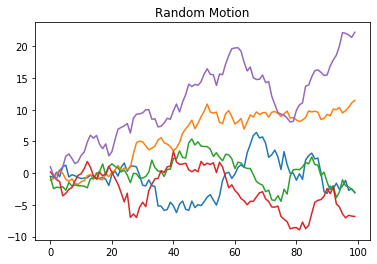

In [6]:
import numpy as np
import matplotlib.pyplot as plt
xs = np.random.randn(5, 100)

plt.title("Random Motion")
bms = xs.cumsum(axis=1)
for bm in bms:
    plt.plot(bm)

### Otras visualizaciones

Cuando la función *plot* se queda corta:

* Diagramas de barras 
* Histogramas
* Boxplots
* Scatterplots

In [38]:
df = pd.read_csv("data/experiment.csv")
print(df)

   Nombre Apellidos  Altura Sexo  Nacimiento   Cof Categoria
0    Will     Smith    1.43    M  10/10/1920  0.19   laboral
1     Jon      Snow    1.98    M   10/1/1970  0.98   laboral
2    Laia   Ramirez    1.87    F  09/10/1987  0.76      cap6
3    Luzy      Raim    1.67    F  23/07/1979  0.56      cap6
4    Fein      Mang    1.78    M  12/03/1937  0.27      cap6
5  Victor     Colom    1.78    M  22/09/1957  0.97      cap8


Cómo habiamos visto en el inicio se pueden dibujar únicamente los datos de una serie, que és lo que normalmente serà más útil, sobretodo al trabajar con dataframes con muchas columnas.

A continuación tenemos un ejemplo de creación de una visualización con la serie de la categoria sexo.

Si nos fijamos esta serie no es numérica.

La solución pasa por transformar la serie al numero de apariciones de cada categoria: M o F.

In [11]:
print(df["Sexo"].value_counts());


NameError: name 'df' is not defined

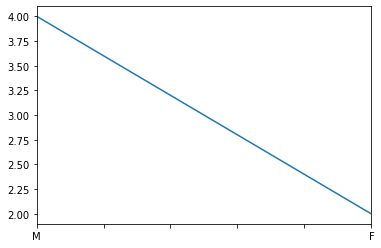

In [40]:
df["Sexo"].value_counts().plot()

### Diagrama de barras
El gráfico anterior no parece que sea muy útil, vamos a ver como un diagramas de barras, nos proporciona una mejor visualización de los datos.

Al inicio hemos visto que se podia dar un título al dibujo. Modificando el entorno podemos modificar otros del gráfico: etiquetats, rango de los ejes, .... 

En este ejemplo hemos cambiado el valor de las etiquetas del eje x (labels).

El [siguiente enlace](https://matplotlib.org/3.1.0/api/axes_api.html) contiene todos los atributos i funciones que existen para modificar el entorno.

[Text(0, 0, 'Hombre'), Text(0, 0, 'Mujer')]

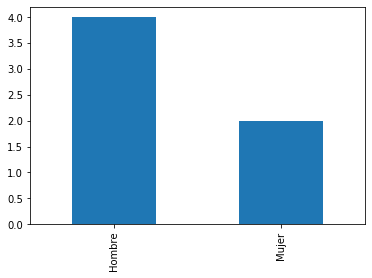

In [41]:
#Controlando el entorno se puede cambiar elementos: titulo, labels, etc.
ax = df["Sexo"].value_counts().plot(kind="bar")
ax.set_xticklabels(["Hombre","Mujer"])

Volviendo al dataset de información de países.
Ponemos otro ejemplo, esta vez para datos numéricos.

**Podriaís añadirle un título?**

[Text(0, 0, 'Argentina'),
 Text(0, 0, 'Armenia'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Austria')]

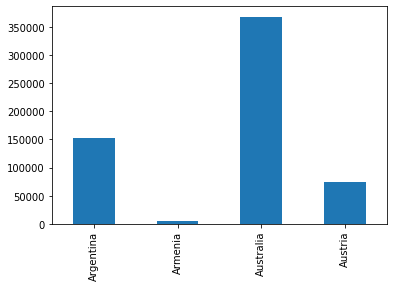

In [44]:
df= pd.read_csv("data/WHO.csv")
co2 = df["Total_CO2_emissions"]
ticks_labels = df["Country"][6:10].values
ax = co2[6:10].plot(kind="bar")
ax.set_xticklabels(ticks_labels)

**Podemos jugar con la selección y ordenación de elementos para hacer visualizaciones con mayor valor**

El siguiente gráfico muestra los 10 países más contaminantes ordenados de mayor a menor.

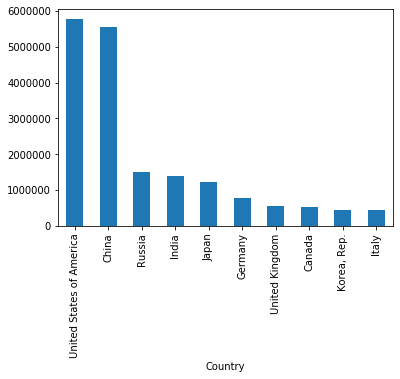

In [45]:
co2 = df["Total_CO2_emissions"].sort_values(ascending=False).head(10) 
dateSelect = df.loc[co2.index] 
co2.index = dateSelect["Country"] 
ax = co2.plot(kind="bar") 

**Atención: Numpy funciona de manera similar**

Aunque no tiene internamente la librería matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
data = np.random.exponential(size=1000)
data = np.sort(data)
plt.plot(data);

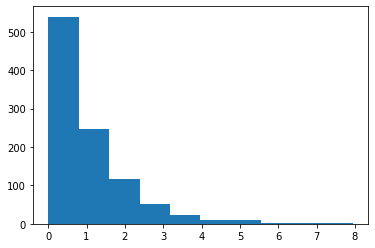

In [54]:
plt.hist(data);

## Histogramas y box plot

Aunque *matplotlib* tiene funcionalidad para dibujar histogramas, los de seaborn ofrecen una funcionaliad más completa.

En primer lugar veremos un ejemplo usando la libreria matplotlib

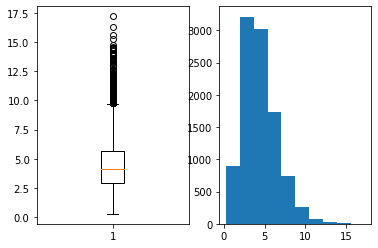

In [15]:

data = np.random.gamma(4.5, 1.0, 10000)

fig, ax = plt.subplots(ncols=2)

ax[0].boxplot(data)
ax[1].hist(data)

plt.show()

Ahora realizaremos un ejemplo similar usando la libreria seaborn:

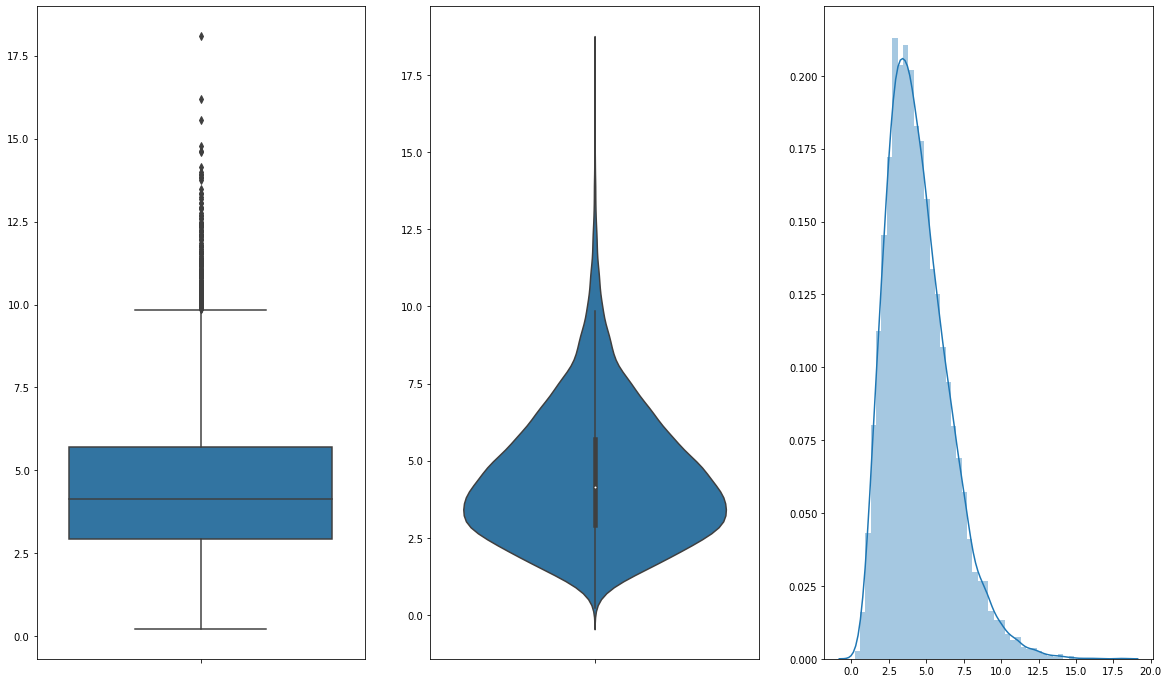

In [20]:
# seaborn
# matplotlib
data = np.random.gamma(4.5, 1.0, 10000)

fig, ax = plt.subplots(ncols=3, figsize=(20, 12))
sns.boxplot(data, ax=ax[0], orient='v')
sns.violinplot(data, ax=ax[1], orient='v')
sns.distplot(data, ax=ax[2])
plt.show()

## Scatter plots
Necesitamos dos arrays o listas del mismo tamaño para poder plotear una contra la otra

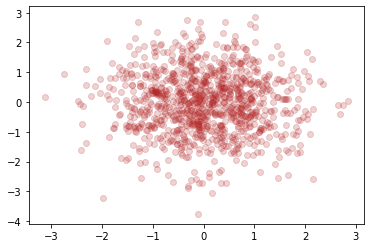

In [6]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)

plt.scatter(x, y, c='firebrick', alpha=0.2)
plt.show()

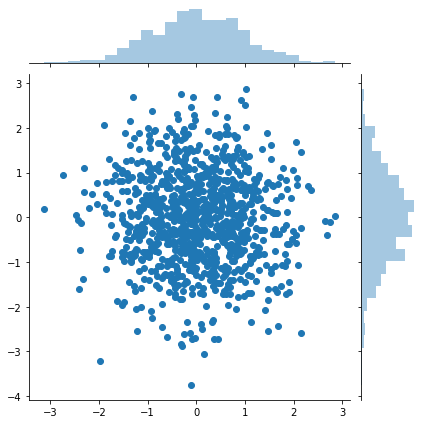

In [18]:
sns.jointplot(x=x, y=y);
#sns.jointplot(x=x, y=y, kind='kde')

# Ejercicios

**1) Si en el último ejemplo hemos visualizado los paises más contaminantes, siguiendo la misma lógica, ¿podrías mostrar los 10 países más poblados ("Population (in thousands) total")? ¿Y los 10 menos poblados?**
Nota: Hay paises donde se desconoce la contaminación que generán (valores NaN) y afectarán a la visualización.

**2) Representa en un gráfico de barras el crecimiento de población (*Population annual growth rate (%)*) de los países del top 10 más poblados.**

**3) Representa en un gráfico de columnas el crecimiento de población del “top 10” de países menos poblados.**

Observación: Hay diferencias notables con los resultados del punto 2.

**4) Representa con un boxplot la contaminación (CO2) de Europa (código continente: 2)**



**5) Genera un sinusoide y añadele ruido aleatorio gaussiano con media=0 y std=0.1 y grafícalo.**

```x = np.linspace(0, 4*np.pi, 1000)```